In [20]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [21]:
from proj1_helpers import *

DATA_TRAIN_PATH = "data/train.csv" # download train data and supply path
y_tr, tX_tr, ids_tr = load_csv_data(DATA_TRAIN_PATH)

DATA_TEST_PATH = "data/test.csv" #download train data and supply path
y_fin, tX_fin, ids_fin = load_csv_data(DATA_TEST_PATH)

## Implementation

In [22]:
from data_analysis import *

##### Data analysis #####

#Separate the data
jet_num = 0
y0_tr, tX0_tr, ids0_tr, y0_fin, tX0_fin, ids0_fin = data_analysis(jet_num, y_tr, tX_tr, ids_tr, y_fin, tX_fin, ids_fin)
jet_num = 1
y1_tr, tX1_tr, ids1_tr, y1_fin, tX1_fin, ids1_fin = data_analysis(jet_num, y_tr, tX_tr, ids_tr, y_fin, tX_fin, ids_fin)
jet_num = 2
y2_tr, tX2_tr, ids2_tr, y2_fin, tX2_fin, ids2_fin = data_analysis(jet_num, y_tr, tX_tr, ids_tr, y_fin, tX_fin, ids_fin)
jet_num = 3
y3_tr, tX3_tr, ids3_tr, y3_fin, tX3_fin, ids3_fin = data_analysis(jet_num, y_tr, tX_tr, ids_tr, y_fin, tX_fin, ids_fin)


In [23]:
# Split the data into train (80%) and test (20%) parts 
ratio = 0.8;
tX0_tr, tX0_te, y0_tr, y0_te, ids0_tr, ids0_te = split_data(tX0_tr, y0_tr, ids0_tr, ratio)
tX1_tr, tX1_te, y1_tr, y1_te, ids1_tr, ids1_te = split_data(tX1_tr, y1_tr, ids1_tr, ratio)
tX2_tr, tX2_te, y2_tr, y2_te, ids2_tr, ids2_te = split_data(tX2_tr, y2_tr, ids2_tr, ratio)
tX3_tr, tX3_te, y3_tr, y3_te, ids3_tr, ids3_te = split_data(tX3_tr, y3_tr, ids3_tr, ratio)

In [24]:
from implementation import *
from optimization import * 

##### Machine learning #####

# Least squares

#w0, loss0 = least_squares(y0, tX0)
#w1, loss1 = least_squares(y1, tX1)
#w2, loss2 = least_squares(y2, tX2)
#w3, loss3 = least_squares(y3, tX3)


3
5
0.1
0


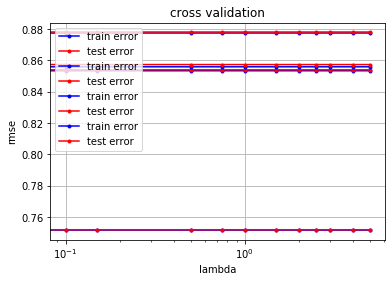

In [25]:
from implementation import *
from optimization import * 

##### TRAINING #####
##### Cross validation #####

best_lambdas = [0., 0., 0., 0.,]

best_lambdas[0] = cross_validation_lambda(y0_tr, tX0_tr)
print(best_lambdas[0])

best_lambdas[1] = cross_validation_lambda(y1_tr, tX1_tr)
print(best_lambdas[1])

best_lambdas[2] = cross_validation_lambda(y2_tr, tX2_tr)
print(best_lambdas[2])

best_lambdas[3] = cross_validation_lambda(y3_tr, tX3_tr)
print(best_lambdas[3])


In [26]:
#best_lambdas = [100, 100, 100, 100]

##### Ridge regression #####

w0, loss0 = ridge_regression(y0_tr, tX0_tr, best_lambdas[0])
w1, loss1 = ridge_regression(y1_tr, tX1_tr, best_lambdas[1])
w2, loss2 = ridge_regression(y2_tr, tX2_tr, best_lambdas[2])
w3, loss3 = ridge_regression(y3_tr, tX3_tr, best_lambdas[3])

In [27]:
print(best_lambdas)

[3, 5, 0.1, 0]


## Test the implementation:

In [28]:
##### TESTING #####

y0_pred = predict_labels(w0, tX0_te)
y1_pred = predict_labels(w1, tX1_te)
y2_pred = predict_labels(w2, tX2_te)
y3_pred = predict_labels(w3, tX3_te)

print(y0_pred.shape)
print(y0_te.shape)

grades = [0., 0., 0., 0.]
res0 = np.where(y0_te[:,] == y0_pred[:,], 1, 0)
grades[0] = np.mean(res0)
res1 = np.where(y1_te[:,] == y1_pred[:,], 1, 0)
grades[1] = np.mean(res0)
res2 = np.where(y2_te[:,] == y2_pred[:,], 1, 0)
grades[2] = np.mean(res2)
res3 = np.where(y3_te[:,] == y3_pred[:,], 1, 0)
grades[3] = np.mean(res3)
grade = np.mean(grades)


(19983,)
(19983,)


In [29]:
print(grade)

0.7679943838333655


## Generate predictions and save ouput in csv format for submission:

In [37]:
y0_pred = predict_labels(w0, tX0_fin)
y1_pred = predict_labels(w1, tX1_fin)
y2_pred = predict_labels(w2, tX2_fin)
y3_pred = predict_labels(w3, tX3_fin)

In [39]:
y_pred = np.concatenate([y0_pred, y1_pred, y2_pred, y3_pred])
ids_pred = np.concatenate([ids0_te, ids1_te, ids2_te, ids3_te])
OUTPUT_PATH = 'data/results_ridge_cross_validation.csv' 
create_csv_submission(ids_pred, y_pred, OUTPUT_PATH)

(568238,)


In [ ]:
"Result : 0. ..."